In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import neighbors, datasets
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [3]:
np.arange(60,100, 5)

array([60, 65, 70, 75, 80, 85, 90, 95])

In [4]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [5]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest \(Emma\)
- Adaboost
- SVC
- 
- NEURAL NETWORKS  Thomas
- KNN
- Logistic Regression \(kenju\)
- Naive bayes
- 
- 
- Naive Bayes \(Rhone\)
- Adaboost \(Jeffrey\)
- Support vector classifier \(halli\)
- 
- Stochastic Gradient Descent Classifier \(SGDClassifier\)
  - https://scikit\-learn.org/stable/modules/generated/sklearn.linear\_model.SGDClassifier.html
- Support vector classifier 
- KNN \(Rhone\)
- 
- 

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [6]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [8]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
391,70,1,2,115,0,0,1,92,1,0.0,1
284,42,1,2,140,358,0,0,170,0,0.0,0
257,36,1,1,150,160,0,0,172,0,0.0,0
521,61,1,2,120,282,0,1,135,1,4.0,2
834,44,1,0,120,220,0,0,170,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
663,66,1,0,160,246,0,0,120,1,0.0,1
607,53,1,2,144,300,1,1,128,1,1.5,1
426,56,1,0,126,166,0,1,140,0,0.0,0
523,59,1,2,124,160,0,0,117,1,1.0,1


In [10]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
x_test.shape

grid search cv

In [0]:
#ADABOOST
# parameters = {'n_estimators':[50, 100, 125, 150], 'learning_rate': [0.01, 0.1, 0.3, 0.5]}
# scoring = ['precision', 'accuracy', 'recall', 'f1']


# for score in scoring:
#     abc = AdaBoostClassifier()
#     grid_abc = GridSearchCV(abc, parameters, scoring=score)
#     grid_abc.fit(x_train, y_train)


#     print("best params for %s: " % score)
#     print(grid_abc.best_params_)

#     means = grid_abc.cv_results_["mean_test_score"]

#     print("mean scores")
#     for mean, params in zip(means, grid_abc.cv_results_["params"]):
#         print("%0.5f for %r" % (mean, params))

abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
abc.fit(x_train, y_train)

y_predictions = abc.predict(x_test)

total_squared_error = (np.sum((y_test - y_predictions)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
#print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='g')
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions, average='micro')
recall = recall_score(y_test, y_predictions, average='micro')
f1 = f1_score(y_test, y_predictions, average='micro')
scores['Adaboost'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['Adaboost'])



Adaboost is an example of ensemble learning, where several basic algorithms are combined to make one more optimized algorithm. For example, with a decision tree, instead of hoping 1 decision tree can correctly guess a result, ensemble learning will take multiple decision trees and combine them together to create a stronger algorithm.

Adaboost is also a sequential learning version of ensemble learning, where every model is made in order, and the newest model learns from the previous model's failures. It does this by "boosting", or reducing the error through methods such as increasing the weights of data that was mislabelled.

However, Adaboost is extremely sensitive to noisy data and outliers, which is why it is highly recommended to remove outliers from data with Adaboost.

Here, Adaboost was used on our heart disease dataset, with a mean squared error of 0.12 on our testing data, and an overall accuracy score of 0.880 and a precision score of 0.880. There were 13 false positives and 9 false negatives. This is a decent score for a machine learning model, but when it comes to diagnosis it probably isn't the best and there is certainly a more ideal model. 


In [0]:
heart_dfs = heart_df.copy()
target = heart_dfs["HeartDisease"]
input_columns = heart_dfs.loc[:, heart_dfs.columns != "HeartDisease"]
y = heart_df["HeartDisease"]
param_grid = {'n_neighbors': range(1, 400)}

x = KNN()
grid_x = GridSearchCV(x, param_grid)
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,stratify =y, random_state=42)

grid_x.fit(x_train, y_train)
print(grid_x.best_params_)

In [0]:
heart_dfs = heart_df.copy()
target = heart_dfs["HeartDisease"]
input_columns = heart_dfs.loc[:, heart_dfs.columns != "HeartDisease"]
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)




x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,stratify =target, random_state=42)
KNN_OLD_MODEL = KNN()
KNN_model = KNN(n_neighbors = 23)
KNN_model.fit(x_train,y_train)

y_hat = KNN_model.predict(x_test)

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['KNN_ADJUSTED'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN_ADJUSTED'])

The KNN nearest neighbors function looks for the k nearest neighbors of a point and their classification and then classifies the point based on the state of the nearest neighbors. Using GridSearchCV, I tried to optimize the value of the k nearest neighbors in a range from 1 to 400 and it was found that 23 was the most optimal number. It ended up giving a success rate of roughly 72.8 percent with 25 false positives and 25 false negative, 57 correct positives, and 77 correct negatives, a recall rate of 75.5 percent a precision rate of 75.5 percent, and an f1\_score of 75.5 percent. These numbers would be described as a moderately \-to good accurate model.



In [0]:
"""#y_hat = KNN_model.predict(x_test)
map_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

clf = neighbors.KNeighborsClassifier(n_neighbors = 23, weights='distance')
clf.fit(x_train, y_train)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])"""

In [0]:
#print(y_hat)
print(np.array(y_test))

"""total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)"""
"""sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])"""

In [0]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [0]:
# Please save scores like the example below
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

The model is a logistic regression and it works by predicting whether someone has heart disease or if they do not. It classifies them into one of these two groups . We changed some parameters such as the weight, training and testing data. I think it performed well in predicting if someone has heart disease and classifying them into two groups. It does this by analyzing relationships between two independent variables. The coefficient of the linear regression model shows the relationship between the variables by multiplying it with a certain value and a higher/lower coefficient indicates which classification the data point would be predicted to be in.


{'accuracy': 0.8478260869565217, 'precision': 0.8495575221238938, 'recall': 0.897196261682243, 'f1_score': 0.8727272727272727}


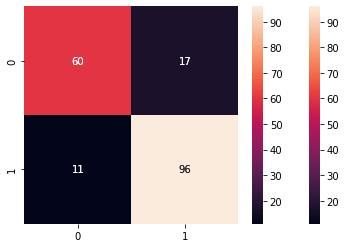

In [14]:
#x is everything but heart disease
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
#y is heart disease
y = heart_df['HeartDisease']
# splits dataset; 80 percent train: 20 percent test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
#scales down the x values
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
lr_clf = LogisticRegression(random_state=42)
#Fits dataset
lr_clf.fit(x_train, y_train)
#gets predicted values
y_pred= lr_clf.predict(x_test)
#compares predictions to actual values
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

"""total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)"""

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['LOGISTICREGRESSION'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['LOGISTICREGRESSION'])



In [21]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [17]:
lr_clf.coef_

array([[-0.05035417,  0.52130825,  0.70399177,  0.08542451, -0.25692624,
         0.46711163,  0.05839025, -0.28834911,  0.56634088,  0.36548402,
         1.0337979 ]])

In [19]:
lr_clf.intercept_

array([0.33897953])

In [0]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="heart dataframe, auc="+str(auc))
plt.legend(loc=4)
plt.show()
"""fpr = dict()
tpr = dict()
roc_auc = dict()

y = label_binarize(y, classes=[0, 1, 2,])
n_classes = y.shape[1]


for i in y_test:
    i = int(i)
y_test = list(y_test)
for i in y_pred:
    i = int(i)
y_pred = list(y_pred)
print(type(y_test))
for i in y_pred:
    for x in y_test:
        if i == -1 <= x:
            print(i)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[0:i], y_pred[0:i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#This plots the tradeoff of positive rate to false positive rate(roc curve)"""
"""fitted_y = np.array(y_pred)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(heart_df.loc[:, heart_df.columns != "HeartDisease"],heart_df['HeartDisease'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_test,y_test,y_pred.reshape(x_test.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()"""

In [0]:
heart_dfs = heart_df.copy()
target = heart_dfs["HeartDisease"]
input_columns = heart_dfs.loc[:, heart_dfs.columns != "HeartDisease"]
y = heart_df["HeartDisease"]
param_grid = {'var_smoothing':range(0,200)}
x = GaussianNB()
grid_x = GridSearchCV(x, param_grid)
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,stratify =y, random_state=42)

grid_x.fit(x_train, y_train)
print(grid_x.best_params_)

In [0]:
# define x as all columns but heart disease

X = heart_df.loc[:, heart_df.columns != "HeartDisease"]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
#define y as heart_disease
y = heart_df['HeartDisease']
#split data set 80 percent train: 20 percent test


n_iter = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
#scales down x_values
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test)
thresholder = VarianceThreshold(threshold=.5)

x_train = thresholder.fit_transform(x_train)
x_test = thresholder.fit_transform(x_test)
#create object model
gnb = GaussianNB(priors=None, var_smoothing=1e-06)
#fit object model
gnb.fit(x_train, y_train)
GaussianNB(priors=None, var_smoothing= 1)
y_pred = gnb.predict(x_test)
#print("Naive Bayes score: ",gnb.score(X_test, y_test))#
#print("Number of mislabeled points out of a total %d points : %d"


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['NAIVEBAYES'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['NAIVEBAYES'])
print("Naive Bayes score: ",gnb.score(x_test, y_test))


Gaussian Naive Bayes is for binary classification and assumes that all continuous data has normal distribution, and that all features are independent and equal from each other. The Naive Bayes finds the probability of the predicted outcome\(y variable\) given the x values and then classifies the point based on whether one of the classifications had a higher probability than the other classification. In order to optimize the function, I stratified the data, which raised the accuracy score from 0.83 to 0.885 while also scaling the data though that did not cause a change in the accuracy score or any of the other measures. The results ending up giving a accuracy score of 0.885, a precision score of 0.878, a recall score of 0.921, and an f1 score of 0.899. This resulted in 8 false negatives and 13 false positives out of 184 points in what I believe can be described as an accurate model.



In [0]:
(89)/(89+12)
(65)/(65+18)

In [29]:
# SVC Model

#configuring the data
target = heart_df['HeartDisease']
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

x_train.shape

(734, 11)

In [30]:
from sklearn.svm import SVC

#changing the kernel
my_SVC_model = SVC(kernel = 'rbf')

#fitting the model
my_SVC_model.fit(x_train, y_train)

ValueError: could not convert string to float: 'M'

In [0]:
#predicting results
y_hat = my_SVC_model.predict(x_test)

In [0]:
y_hat

In [0]:
np.array(y_test)

In [0]:
#MSE
#total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
#mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
#print(mean_squared_error)

In [0]:
#Confusion Matrix
#sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
#acc = accuracy_score(y_test, y_hat)
#fone_score = f1_score(y_test, y_hat)
#rec = recall_score(y_test, y_hat)
#prec = precision_score(y_test, y_hat)

#accuracy, f1 score, recall, precision
#print("Accuracy: " , acc , "f1 Score: " , fone_score, "Recall: " , rec, "Precision: " , prec)

In [25]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up
762,40,M,ASY,110,167,0,LVH,114,Y,2.0,Flat
110,59,F,ATA,130,188,0,Normal,124,N,1.0,Flat
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up
...,...,...,...,...,...,...,...,...,...,...,...
177,59,M,ATA,140,287,0,Normal,150,N,0.0,Up
366,61,M,ASY,150,0,0,Normal,117,Y,2.0,Flat
93,48,M,ASY,160,329,0,Normal,92,Y,1.5,Flat
764,41,F,NAP,112,268,0,LVH,172,Y,0.0,Up


In [27]:
svc_clf = svc()
svc_clf.fit(x_train, y_train)
svc_pred = svc_clf.predict(x_test)
prec = precision_score(y_test, svc_pred)
print(prec)

ValueError: could not convert string to float: 'M'

In [26]:
svc_pred

NameError: name 'svc_pred' is not defined

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC as svc
from sklearn import preprocessing
from scipy import stats

# target = heart_df['HeartDisease']
# input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]

# # splitting the data
# x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state = 45)

mdl = svc()
# 'kernel': ('poly', 'linear', 'rbf', 'sigmoid')

rand_list = {'C': list(range(1, 100)), 'gamma': list(range(1, 100)), 'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}
rand_search = RandomizedSearchCV(mdl, rand_list, n_iter = 100, cv = 5, verbose=100)
rand_search.fit(x_train, y_train)
rand_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START C=13, gamma=89, kernel=linear.............................
[CV 1/5; 1/100] END C=13, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 2/5; 1/100] START C=13, gamma=89, kernel=linear.............................
[CV 2/5; 1/100] END C=13, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 3/5; 1/100] START C=13, gamma=89, kernel=linear.............................
[CV 3/5; 1/100] END C=13, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 4/5; 1/100] START C=13, gamma=89, kernel=linear.............................
[CV 4/5; 1/100] END C=13, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 5/5; 1/100] START C=13, gamma=89, kernel=linear.............................
[CV 5/5; 1/100] END C=13, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 1/5; 2/100] START C=19, gamma=95, kernel=rbf................................
[CV 1/5; 2/100] END ...C=19, gamma=95, kernel=

[CV 5/5; 11/100] END .C=94, gamma=35, kernel=poly;, score=nan total time=   0.0s
[CV 1/5; 12/100] START C=28, gamma=77, kernel=poly..............................
[CV 1/5; 12/100] END .C=28, gamma=77, kernel=poly;, score=nan total time=   0.0s
[CV 2/5; 12/100] START C=28, gamma=77, kernel=poly..............................
[CV 2/5; 12/100] END .C=28, gamma=77, kernel=poly;, score=nan total time=   0.0s
[CV 3/5; 12/100] START C=28, gamma=77, kernel=poly..............................
[CV 3/5; 12/100] END .C=28, gamma=77, kernel=poly;, score=nan total time=   0.0s
[CV 4/5; 12/100] START C=28, gamma=77, kernel=poly..............................
[CV 4/5; 12/100] END .C=28, gamma=77, kernel=poly;, score=nan total time=   0.0s
[CV 5/5; 12/100] START C=28, gamma=77, kernel=poly..............................
[CV 5/5; 12/100] END .C=28, gamma=77, kernel=poly;, score=nan total time=   0.0s
[CV 1/5; 13/100] START C=74, gamma=69, kernel=rbf...............................
[CV 1/5; 13/100] END ..C=74,

[CV 3/5; 24/100] END C=84, gamma=9, kernel=linear;, score=nan total time=   0.0s
[CV 4/5; 24/100] START C=84, gamma=9, kernel=linear.............................
[CV 4/5; 24/100] END C=84, gamma=9, kernel=linear;, score=nan total time=   0.0s
[CV 5/5; 24/100] START C=84, gamma=9, kernel=linear.............................
[CV 5/5; 24/100] END C=84, gamma=9, kernel=linear;, score=nan total time=   0.0s
[CV 1/5; 25/100] START C=21, gamma=17, kernel=sigmoid...........................
[CV 1/5; 25/100] END C=21, gamma=17, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5; 25/100] START C=21, gamma=17, kernel=sigmoid...........................
[CV 2/5; 25/100] END C=21, gamma=17, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5; 25/100] START C=21, gamma=17, kernel=sigmoid...........................
[CV 3/5; 25/100] END C=21, gamma=17, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5; 25/100] START C=21, gamma=17, kernel=sigmoid...........................
[CV 4/5; 25/100] END C

[CV 4/5; 34/100] END C=22, gamma=48, kernel=linear;, score=nan total time=   0.0s
[CV 5/5; 34/100] START C=22, gamma=48, kernel=linear............................
[CV 5/5; 34/100] END C=22, gamma=48, kernel=linear;, score=nan total time=   0.0s
[CV 1/5; 35/100] START C=49, gamma=70, kernel=sigmoid...........................
[CV 1/5; 35/100] END C=49, gamma=70, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5; 35/100] START C=49, gamma=70, kernel=sigmoid...........................
[CV 2/5; 35/100] END C=49, gamma=70, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5; 35/100] START C=49, gamma=70, kernel=sigmoid...........................
[CV 3/5; 35/100] END C=49, gamma=70, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5; 35/100] START C=49, gamma=70, kernel=sigmoid...........................
[CV 4/5; 35/100] END C=49, gamma=70, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5; 35/100] START C=49, gamma=70, kernel=sigmoid...........................
[CV 5/5; 35/100] E

[CV 5/5; 45/100] END C=49, gamma=64, kernel=linear;, score=nan total time=   0.0s
[CV 1/5; 46/100] START C=41, gamma=11, kernel=linear............................
[CV 1/5; 46/100] END C=41, gamma=11, kernel=linear;, score=nan total time=   0.0s
[CV 2/5; 46/100] START C=41, gamma=11, kernel=linear............................
[CV 2/5; 46/100] END C=41, gamma=11, kernel=linear;, score=nan total time=   0.0s
[CV 3/5; 46/100] START C=41, gamma=11, kernel=linear............................
[CV 3/5; 46/100] END C=41, gamma=11, kernel=linear;, score=nan total time=   0.0s
[CV 4/5; 46/100] START C=41, gamma=11, kernel=linear............................
[CV 4/5; 46/100] END C=41, gamma=11, kernel=linear;, score=nan total time=   0.0s
[CV 5/5; 46/100] START C=41, gamma=11, kernel=linear............................
[CV 5/5; 46/100] END C=41, gamma=11, kernel=linear;, score=nan total time=   0.0s
[CV 1/5; 47/100] START C=96, gamma=87, kernel=poly..............................
[CV 1/5; 47/100] END .

[CV 1/5; 63/100] END ..C=55, gamma=43, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5; 63/100] START C=55, gamma=43, kernel=rbf...............................
[CV 2/5; 63/100] END ..C=55, gamma=43, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5; 63/100] START C=55, gamma=43, kernel=rbf...............................
[CV 3/5; 63/100] END ..C=55, gamma=43, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5; 63/100] START C=55, gamma=43, kernel=rbf...............................
[CV 4/5; 63/100] END ..C=55, gamma=43, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5; 63/100] START C=55, gamma=43, kernel=rbf...............................
[CV 5/5; 63/100] END ..C=55, gamma=43, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5; 64/100] START C=63, gamma=52, kernel=linear............................
[CV 1/5; 64/100] END C=63, gamma=52, kernel=linear;, score=nan total time=   0.0s
[CV 2/5; 64/100] START C=63, gamma=52, kernel=linear............................
[CV 2/5; 64/100] END C=63, 

[CV 4/5; 79/100] END C=6, gamma=34, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5; 79/100] START C=6, gamma=34, kernel=sigmoid............................
[CV 5/5; 79/100] END C=6, gamma=34, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5; 80/100] START C=71, gamma=43, kernel=sigmoid...........................
[CV 1/5; 80/100] END C=71, gamma=43, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5; 80/100] START C=71, gamma=43, kernel=sigmoid...........................
[CV 2/5; 80/100] END C=71, gamma=43, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5; 80/100] START C=71, gamma=43, kernel=sigmoid...........................
[CV 3/5; 80/100] END C=71, gamma=43, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5; 80/100] START C=71, gamma=43, kernel=sigmoid...........................
[CV 4/5; 80/100] END C=71, gamma=43, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5; 80/100] START C=71, gamma=43, kernel=sigmoid...........................
[CV 5/5; 80/100] E

[CV 2/5; 96/100] END C=62, gamma=21, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5; 96/100] START C=62, gamma=21, kernel=sigmoid...........................
[CV 3/5; 96/100] END C=62, gamma=21, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5; 96/100] START C=62, gamma=21, kernel=sigmoid...........................
[CV 4/5; 96/100] END C=62, gamma=21, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5; 96/100] START C=62, gamma=21, kernel=sigmoid...........................
[CV 5/5; 96/100] END C=62, gamma=21, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5; 97/100] START C=29, gamma=89, kernel=linear............................
[CV 1/5; 97/100] END C=29, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 2/5; 97/100] START C=29, gamma=89, kernel=linear............................
[CV 2/5; 97/100] END C=29, gamma=89, kernel=linear;, score=nan total time=   0.0s
[CV 3/5; 97/100] START C=29, gamma=89, kernel=linear............................
[CV 3/5; 97/100] E

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 173, in fit
    X, y = self._validate_data(
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'M'

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 173, in fit
    X, y = self._validate_data(
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'F'


In [31]:
from sklearn.svm import SVC

#changing the kernel
my_SVC_model = SVC(kernel = 'linear', 'c' = 9, 'gamma' = 96)

#fitting the model
my_SVC_model.fit(x_train, y_train)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (647793332.py, line 4)

In [21]:
y_hat = my_SVC_model.predict(x_test)
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

ValueError: could not convert string to float: 'F'

In [15]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
fone_score = f1_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)

#accuracy, f1 score, recall, precision
print("Accuracy: " , acc , "f1 Score: " , fone_score, "Recall: " , rec, "Precision: " , prec)

NameError: name 'y_hat' is not defined

In [0]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC as svc
#from sklearn import preprocessing
#from scipy import stats

#mdl = svc()
#param_grid = {"C": [.1, 1, 10, 100, 1000], 'gamma': [.1, 1, 10, 100, 1000], 'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}
#grid = GridSearchCV(mdl, param_grid, refit = True, verbose = 7)
#grid.fit(x_train, y_train)


#grid_search = GridSearchCV(mdl, param_grid = grid_list, cv = 5)
#grid_search.fit(x_train, y_train)
#print(grid.best_params_)
#print("hi")

Support Vector Classification Model uses two groups of data to categorize new data.  It does this by plotting the data onto a graph, and then using a hyperplane to split the data according to the group that the data belongs to. The hyper\-parameters  that could be fine tuned are the Kernel, the C value, the Gamma value, and the Degree. I decided to use a RandomizedSearchCV to determine the best parameters.  When testing, for the best parameters, I ran into some problems. The first problem was how long it took too long to run the program. The program would run for about thirty minutes, and still not find a best fit for the graph. In response, I decided to decrease the amount of variables the RandomizedSearchCV needed to look for, and additionally, the range that each variable could search within. In the end, I decided that testing the C value, the Gamma value, and the Kernel would be most helpful in optimizing the model. According to my values the RandomizedSearchCV determine the best parameters was a Kernel of linear, a Gamma value of 96, and a C value of 9.

